# HW 1 Part 1: Preprocessing the Credit Approval Dataset

Perform the following tasks on the credit approval dataset (crx.data contains the dataset and crx.names contains the description of the dataset). High pass and low pass specifications are on Canvas. Please note that ALL questions labelled [LP] must be completed satisfactorily to receive a low pass on the assignment. The [HP] question specifications combine all parts of the homework. Please refer to Canvas for more details.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

In [2]:
## Your code goes here. Import the csv into a pandas dataframe here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./crx.data', header=None, na_values="?")


[LP 1] Deal with the missing values in the credit analysis dataset. Explain what you did with the following columns:

1. Column A1 (at index 0) 
2. Column A2 (at index 1)
3. Column A4 (at index 3)
4. Column A5 (at index 4)
5. Column A6 (at index 5)
6. Column A7 (at index 6)
7. Column A14 (at index 13)



Following the class activities performed in class on the credit approval dataset, the names file gives us a list of attributes with missing values. In class we dealt with the missing values using a pandas function parameter. When we read the data into a DataFrame, we can set na_values = "?", so that when pandas is reading the data, it treats the ? as a missing value. After missing values are read correctly, we can now take a look at each one the columns below to deal with the missing values. 

For attributes with categorical data, we can look at the more frequently occuring category aka mode and replace the null values with the mode. 

For attributes with numerical data, we can look at the mean value of the given attribute and replace null values with the mean. 



1. Column A1, is categorical a,b data with top category being b, and has 12 missing values
2. Column A2, is numerical and has 12 "?" missing values.
3. Column A4, is categorical and has 6 missing values
4. Column A5, is categorical and has 6 missing values
5. Column A6, is categorical and has 9 missing values
6. Column A7, is categorical and has 9 missing values
7. Column A14, is numerical and has 13 missing values

For all the attributes with categorical data, using value_counts() function to see the frequencey of each category. 

For all the attributes with numerical data, using describe() function to see the mean of the attribute. 

After observing the data, I want to fill in null values for numerical data with the attribute mean and categorical data with mode of the attribute. 

In [3]:
## Your code for LP 1 goes here.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      677 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [5]:
df[15].value_counts

<bound method IndexOpsMixin.value_counts of 0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: 15, Length: 690, dtype: object>

In [6]:
df[0].value_counts()

b    468
a    210
Name: 0, dtype: int64

In [7]:
df[1].describe()

count    678.000000
mean      31.568171
std       11.957862
min       13.750000
25%       22.602500
50%       28.460000
75%       38.230000
max       80.250000
Name: 1, dtype: float64

In [8]:
df[3].value_counts()

u    519
y    163
l      2
Name: 3, dtype: int64

In [9]:
df[4].value_counts()

g     519
p     163
gg      2
Name: 4, dtype: int64

In [10]:
df[5].value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: 5, dtype: int64

In [11]:
df[6].value_counts()

v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: 6, dtype: int64

In [12]:
df[13].describe()

count     677.000000
mean      184.014771
std       173.806768
min         0.000000
25%        75.000000
50%       160.000000
75%       276.000000
max      2000.000000
Name: 13, dtype: float64

In [13]:
df = df.fillna(df.mean(numeric_only=True))
print(df.info())
print("Null Samples after filling in numerical data: ", df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB
None
Null Samples after filling in numerical data:  42


In [14]:
print(df[1].describe())

count    690.000000
mean      31.568171
std       11.853273
min       13.750000
25%       22.670000
50%       28.625000
75%       37.707500
max       80.250000
Name: 1, dtype: float64


In [15]:
print(df[13].describe())

count     690.000000
mean      184.014771
std       172.159274
min         0.000000
25%        80.000000
50%       160.000000
75%       272.000000
max      2000.000000
Name: 13, dtype: float64


In [16]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode())
print(df.info())
print("Null samples after filling in categorical data: ", df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB
None
Null samples after filling in categorical data:  42


In [17]:
print(df[0].value_counts())
print(df[3].value_counts())
print(df[4].value_counts())
print(df[5].value_counts())
print(df[6].value_counts())


b    468
a    210
Name: 0, dtype: int64
u    519
y    163
l      2
Name: 3, dtype: int64
g     519
p     163
gg      2
Name: 4, dtype: int64
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: 5, dtype: int64
v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: 6, dtype: int64



[LP 2] Use encoders and convert the categorical variables to numerical values: Columns A1, A4, A5, A6, A7, A9, A10, A12, A13


In [18]:
## Your code for LP 2 goes here. 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    int32  
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       690 non-null    int32  
 4   4       690 non-null    int32  
 5   5       690 non-null    int32  
 6   6       690 non-null    int32  
 7   7       690 non-null    float64
 8   8       690 non-null    int32  
 9   9       690 non-null    int32  
 10  10      690 non-null    int64  
 11  11      690 non-null    int32  
 12  12      690 non-null    int32  
 13  13      690 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    int32  
dtypes: float64(4), int32(10), int64(2)
memory usage: 59.4 KB
None


In [19]:
df[0].value_counts()

df.head()

#df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


[HP 1] Describe your choices to preprocess these columns and explain why they are appropriate for the column.

< Your answer for HP 1 goes here >

## Note: Using the information given in crx.names file to preprocess the dataset, considering each given attribute in the dataset is anonymous. 

### Steps to Preprocess:
    * To preprocess data, we first clean incomplete, noisy, and inconsistent data to improve the quality of data. 
    * Data Integration takes place next.
    * Data Transformation, we can smooth out data and we can perform normalization using a scaler. 
    * Data reduction and Discretization are the last two steps

There are a total of 16 attributes with 690 instances. 

1.) For A1, the column is categorical with two categories and 12 missing values. This requires filling in missing values. When deciding to fill_na, I chose the mode of the column and filled in all null values with the mode. 

2.) For A2, the column is numerical with 12 missing values. Data cleaning is required to fill in missing values. When deciding to fill_na, I chose the mean of the column and filled in all null values with the attribute mean. 

3.) For A3, the column is numerical with no missing values. Therefore, decided to leave column as is. 

4.) For A4, the column is categorical with 4 categories and 6 missing values. Data cleaning is required to fill in the missing values. When deciding to fill_na, I chose the mode of the column and filled in all null values with the mode. 

5.) For A5, the column is categorical with 3 categories and 6 missing values. Data cleaning is required to fill in missing values. When deciding to fill_na, I chose the mode of the column and filled in all null values with the mode. 

6.) For A6, the column is categorical with 14 different categories and 9 missing values. Data cleaning is required to fill in the missing values. When deciding to fill_na, I chose the mode of the column and filled in all null values with the mode. 

7.) For A7, the column is categorical with 9 categories and 9 missing values. Data cleaning is required to fill in the missing values. When deciding to fill_na, I chose the mode of the column and filled in all null values with the mode. 

8.) For A8, the column is numerical and has no missing values. Decided to leave column as is. 

9.) For A9, A10, and A12, the columns are categorical with the same categories and have no missing values in each of the columns. Decided to leave the columns as is.

10.) For A11, the column is continuous and has no missing values, so left the column as is.

11.) For A13, the column is categorical and has no missing values. Therefore, left the column as is. 

12.) For A14, the column is numerical with 13 missing values. Data cleaning is required to fill in null values. When deciding to fill_na, I chose the mean of the column and filled in all null values with the attribute mean. 

13.) For A15, the column is numerical and has no missing values, so left the column as is. 

14.) For A16, the column is categorical, class attribute. It has no missing values, so left the column as is. 

[LP 3] Use an appropriate scaler to scale the numerical values to a suitable range of values. Briefly explain the process you used.

{'whiskers': [<matplotlib.lines.Line2D at 0x15656636280>,
 'caps': [<matplotlib.lines.Line2D at 0x156566367c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15656626fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x15656636d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x15656636fa0>],
 'means': []}

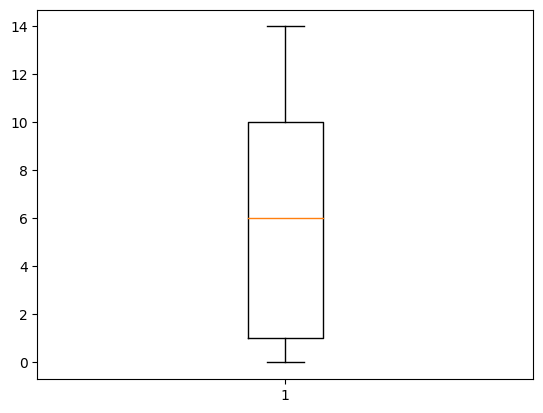

In [25]:
plt.boxplot(df[5])

C:\Users\Jaswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

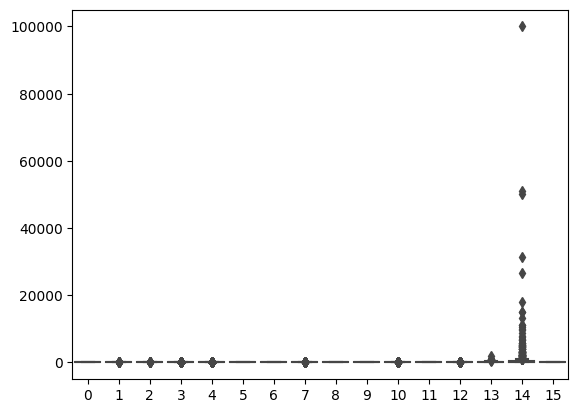

In [ ]:
sns.boxplot(data=df)

After filling in missing values and applying LabelEncoder to convert all data into numeric, we can see that columns 13 and 14 have many outliers in comparision to other columns. 

(array([416., 209.,  53.,   7.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <BarContainer object of 10 artists>)

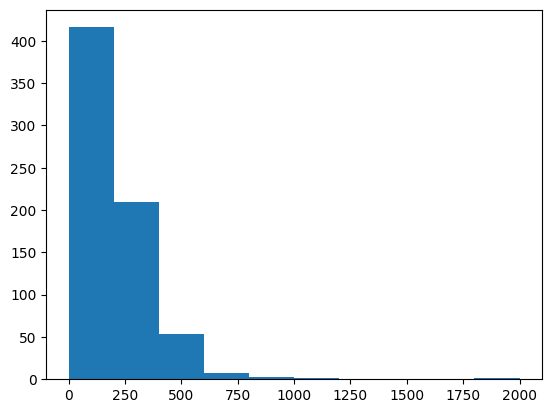

In [26]:
#plt.hist(df[14])
plt.hist(df[13])

In [ ]:
## Your code for LP 3 goes here. 

from sklearn.preprocessing import MinMaxScaler

def preprocess(df):
    scaler = MinMaxScaler(feature_range=(0,1))
    return scaler.fit_transform(df)

In [ ]:
df_clean = preprocess(df)

print(df)

     0      1       2   3   4   5   6     7   8   9   10  11  12     13   14  \
0     1  30.83   0.000   1   0  12   7  1.25   1   1   1   0   0  202.0    0   
1     0  58.67   4.460   1   0  10   3  3.04   1   1   6   0   0   43.0  560   
2     0  24.50   0.500   1   0  10   3  1.50   1   0   0   0   0  280.0  824   
3     1  27.83   1.540   1   0  12   7  3.75   1   1   5   1   0  100.0    3   
4     1  20.17   5.625   1   0  12   7  1.71   1   0   0   0   2  120.0    0   
..   ..    ...     ...  ..  ..  ..  ..   ...  ..  ..  ..  ..  ..    ...  ...   
685   1  21.08  10.085   2   2   4   3  1.25   0   0   0   0   0  260.0    0   
686   0  22.67   0.750   1   0   1   7  2.00   0   1   2   1   0  200.0  394   
687   0  25.25  13.500   2   2   5   2  2.00   0   1   1   1   0  200.0    1   
688   1  17.92   0.205   1   0   0   7  0.04   0   0   0   0   0  280.0  750   
689   1  35.00   3.375   1   0   1   3  8.29   0   0   0   1   0    0.0    0   

     15  
0     0  
1     0  
2     0  

Save your clean dataset in a file called **crx_clean.data**. Submit this file along with the ipynb solution file. 

In [ ]:
## Your code to save the dataframe to a csv file goes here.

# References
Include ALL your references here. 
https://pandas.pydata.org/docs/user_guide/index.html#user-guide

https://colab.research.google.com/drive/1Nif_BV5DfYhP8V9cVM17jgV6TaIAQE3d


# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository
https://gitfront.io/r/ankitajaswal/qV6w48n1b4nx/Cmpe255/

3. The crx_clean.data file

